In [1]:
import pandas as pd

df = pd.read_csv('DMART.NS.csv')

df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-30,3862.000000,3899.000000,3835.300049,3888.350098,3888.350098,267923
1,2021-08-31,3899.000000,3979.750000,3871.149902,3954.800049,3954.800049,378858
2,2021-09-01,3978.000000,4015.000000,3960.050049,3968.600098,3968.600098,249485
3,2021-09-02,3979.000000,3984.449951,3911.000000,3917.649902,3917.649902,206216
4,2021-09-03,3940.000000,3961.699951,3925.050049,3938.899902,3938.899902,262989
...,...,...,...,...,...,...,...
243,2022-08-22,4371.000000,4371.000000,4231.000000,4250.750000,4250.750000,330916
244,2022-08-23,4195.000000,4301.000000,4170.549805,4256.950195,4256.950195,285843
245,2022-08-24,4269.000000,4356.000000,4266.000000,4304.250000,4304.250000,270843
246,2022-08-25,4339.899902,4394.000000,4312.049805,4341.250000,4341.250000,246543


In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2021-08-30,3888.350098
1,2021-08-31,3954.800049
2,2021-09-01,3968.600098
3,2021-09-02,3917.649902
4,2021-09-03,3938.899902
...,...,...
243,2022-08-22,4250.750000
244,2022-08-23,4256.950195
245,2022-08-24,4304.250000
246,2022-08-25,4341.250000


In [3]:
df['Date']

0      2021-08-30
1      2021-08-31
2      2021-09-01
3      2021-09-02
4      2021-09-03
          ...    
243    2022-08-22
244    2022-08-23
245    2022-08-24
246    2022-08-25
247    2022-08-26
Name: Date, Length: 248, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2021-08-30,3888.350098
1,2021-08-31,3954.800049
2,2021-09-01,3968.600098
3,2021-09-02,3917.649902
4,2021-09-03,3938.899902
...,...,...
243,2022-08-22,4250.750000
244,2022-08-23,4256.950195
245,2022-08-24,4304.250000
246,2022-08-25,4341.250000


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     2021-08-30
1     2021-08-31
2     2021-09-01
3     2021-09-02
4     2021-09-03
         ...    
243   2022-08-22
244   2022-08-23
245   2022-08-24
246   2022-08-25
247   2022-08-26
Name: Date, Length: 248, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2021-08-30,3888.350098
2021-08-31,3954.800049
2021-09-01,3968.600098
2021-09-02,3917.649902
2021-09-03,3938.899902
...,...
2022-08-22,4250.750000
2022-08-23,4256.950195
2022-08-24,4304.250000


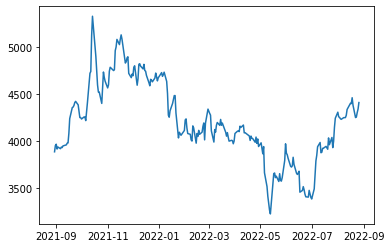

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [17]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-12-30', 
                                '2022-08-26', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-12-30,4668.649902,4721.950195,4683.950195,4639.350098
1,2021-12-31,4721.950195,4683.950195,4639.350098,4671.450195
2,2022-01-03,4683.950195,4639.350098,4671.450195,4711.500000
3,2022-01-04,4639.350098,4671.450195,4711.500000,4726.950195
4,2022-01-05,4671.450195,4711.500000,4726.950195,4687.399902
...,...,...,...,...,...
159,2022-08-22,4398.649902,4460.950195,4382.000000,4250.750000
160,2022-08-23,4460.950195,4382.000000,4250.750000,4256.950195
161,2022-08-24,4382.000000,4250.750000,4256.950195,4304.250000
162,2022-08-25,4250.750000,4256.950195,4304.250000,4341.250000


In [18]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((164,), (164, 3, 1), (164,))

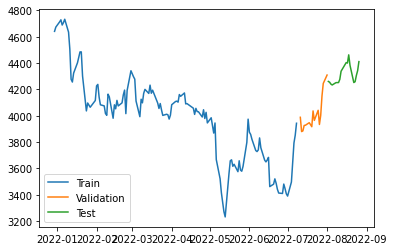

In [19]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 158ms/step - loss: 15932330.0000 - mean_absolute_error: 3977.4863 - val_loss: 16046974.0000 - val_mean_absolute_error: 4004.0037
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 15930449.0000 - mean_absolute_error: 3977.2498 - val_loss: 16045183.0000 - val_mean_absolute_error: 4003.7800
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 15928667.0000 - mean_absolute_error: 3977.0259 - val_loss: 16043276.0000 - val_mean_absolute_error: 4003.5420
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 15926707.0000 - mean_absolute_error: 3976.7791 - val_loss: 16041184.0000 - val_mean_absolute_error: 4003.2805
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 15924594.0000 - mean_absolute_error: 3976.5142 - val_loss: 16039074.0000 - val_mean_absolute_error: 4003.0171
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 15922495.0000 - m

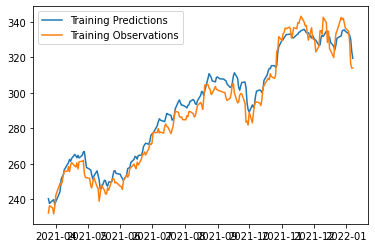

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

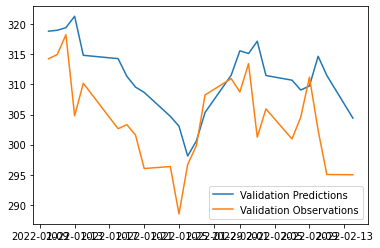

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

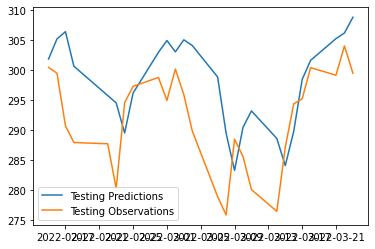

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

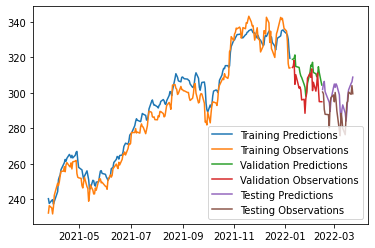

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

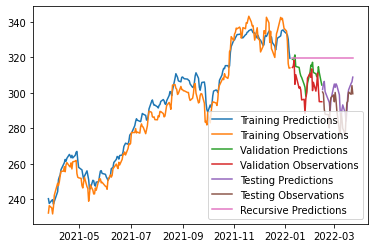

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])